In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv('data.csv')

## Data Exploring

In [ ]:
Stroke.head()

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 399.3+ KB


# Data Cleaning

In [7]:
data.rename(columns={'smoking_status':'smoking','ever_married':'married'} , inplace=True)
data.head()

,id,gender,age,hypertension,heart_disease,married,avg_glucose_level,bmi,smoking,stroke
0,9046,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1


In [8]:
data['stroke']=data['stroke'].replace([1,0],['Yes','No'])
data.head()

,id,gender,age,hypertension,heart_disease,married,avg_glucose_level,bmi,smoking,stroke
0,9046,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,0,Yes,174.12,24.0,never smoked,Yes


In [9]:
data['heart_disease']=data['heart_disease'].replace([1,0],['Yes','No'])
data.head()

,id,gender,age,hypertension,heart_disease,married,avg_glucose_level,bmi,smoking,stroke
0,9046,Male,67.0,0,Yes,Yes,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,0,No,Yes,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,0,Yes,Yes,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,0,No,Yes,171.23,34.4,smokes,Yes
4,1665,Female,79.0,1,No,Yes,174.12,24.0,never smoked,Yes


In [10]:
data.duplicated().sum()

0

In [11]:
data.drop(columns=['bmi'] , inplace=True)

In [12]:
heart_attack = data.loc[data.heart_disease=='Yes']
heart_attack.head()

,id,gender,age,hypertension,heart_disease,married,avg_glucose_level,smoking,stroke
0,9046,Male,67.0,0,Yes,Yes,228.69,formerly smoked,Yes
2,31112,Male,80.0,0,Yes,Yes,105.92,never smoked,Yes
6,53882,Male,74.0,1,Yes,Yes,70.09,never smoked,Yes
11,12095,Female,61.0,0,Yes,Yes,120.46,smokes,Yes
13,8213,Male,78.0,0,Yes,Yes,219.84,Unknown,Yes


In [13]:
non_heart_attack = data.loc[data.heart_disease=='No']
non_heart_attack.head()

,id,gender,age,hypertension,heart_disease,married,avg_glucose_level,smoking,stroke
1,51676,Female,61.0,0,No,Yes,202.21,never smoked,Yes
3,60182,Female,49.0,0,No,Yes,171.23,smokes,Yes
4,1665,Female,79.0,1,No,Yes,174.12,never smoked,Yes
5,56669,Male,81.0,0,No,Yes,186.21,formerly smoked,Yes
7,10434,Female,69.0,0,No,No,94.39,never smoked,Yes


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74


# Statistics

In [15]:
sum=0
for x in heart_attack.age :
    if 50<=x :    
     sum+=1
print(sum*100/len(heart_attack))

94.56521739130434


`` Most of patients almost 94.5% are over 50 years old``



In [16]:
sum=0
for x in heart_attack.gender:
    if x=='Male':
     sum+=1
print(sum*100/len(heart_attack))

59.05797101449275


`` Almost 59% of patients are males ``

In [17]:
pd.value_counts(heart_attack['gender'])

Male      163
Female    113
Name: gender, dtype: int64

``Most of patients are males``

In [18]:
print(68/len(heart_attack)*100)

24.637681159420293


In [19]:
pd.value_counts(heart_attack['smoking'])

never smoked       90
formerly smoked    77
smokes             61
Unknown            48
Name: smoking, dtype: int64

In [20]:
sum=0
for x in heart_attack.smoking:
    if x=='smokes' or x=='formerly smoked':
     sum+=1
print(sum*100/len(heart_attack))

50.0


``Almost 50% of the patients were either smoking or formerly smoked``

In [21]:
heart_attack.age.mean()

68.18840579710145

``The Average of the ages of the patients is 68``

In [22]:
pd.value_counts(heart_attack['hypertension'])

0    212
1     64
Name: hypertension, dtype: int64

# Data Visualization

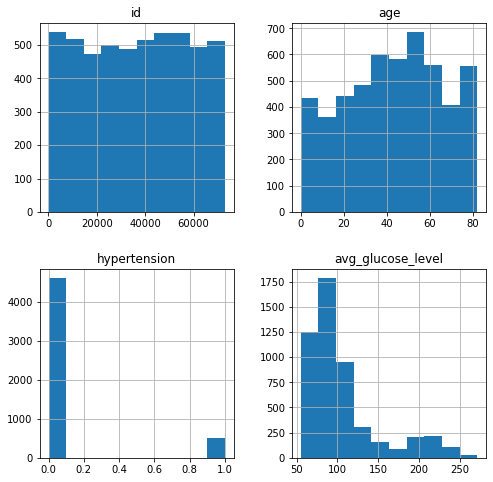

In [23]:
data.hist(figsize=(8,8));

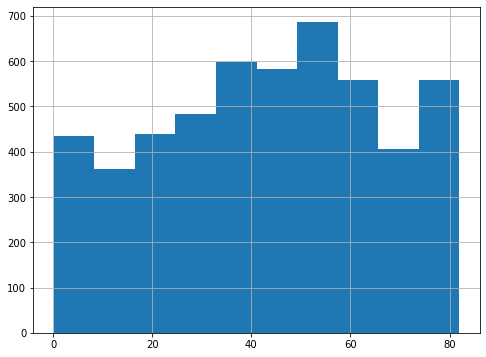

In [24]:
data.age.hist(bins=10 , figsize=(8,6));

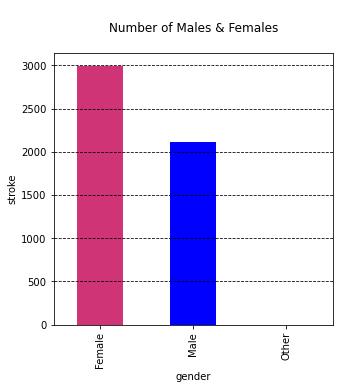

In [28]:
data.groupby('gender').count().avg_glucose_level.plot(kind='bar' , title='\nNumber of Males & Females\n' , color=['#cf3476','blue'] , figsize=(5,5));
plt.xlabel('gender')
plt.ylabel('stroke')
plt.grid(axis='y' , color='black' ,linestyle='--')
plt.show()

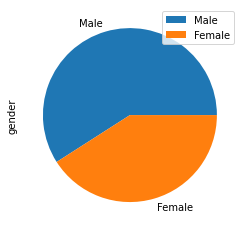

In [31]:
heart_attack['gender'].value_counts().plot(kind='pie')
plt.legend();

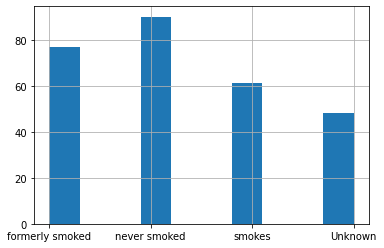

In [32]:
heart_attack['smoking'].hist();

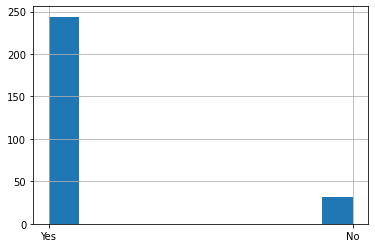

In [33]:
heart_attack['married'].hist();

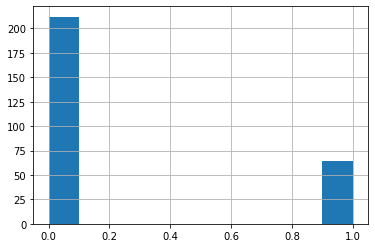

In [34]:
heart_attack['hypertension'].hist();